# Pymaceuticals Inc.
---

### Analysis

All drug regimens have subtantial amount of entries, Capomulin and Ramicane with the most, and Propiva with the fewest. The mice in this study were fairly evenly split between male and female mice with very slightly more males. Capomulin and Ramicane seem to show promise as they reduce tumor sizes considerably compared with Infubinal and Ceftamin. Capomulin's data shows the tumr size consistently decreasing over the treatment period. As the weight of the mouse increases, there is a clear positive correlation in tumor size increasing as well.
 

In [271]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [272]:
# Checking the number of mice.
mouse_count = mouse_data_complete['Mouse ID'].nunique()
# mouse_count = mouse_data_complete.shape[0] #uncomment this line if you mean every line/entry
mouse_count

249

In [273]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [274]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ID = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID'], keep=False)]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [275]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(duplicate_mice)]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [276]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_mouse_data['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [277]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

regimen_group = clean_mouse_data.groupby('Drug Regimen')

tumor_volume_summary = pd.DataFrame({
    'Mean Tumor Volume': regimen_group['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': regimen_group['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': regimen_group['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': regimen_group['Tumor Volume (mm3)'].std(),
    'Tumor Volume SEM': regimen_group['Tumor Volume (mm3)'].sem()
})
tumor_volume_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [278]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_summary_agg = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
)
tumor_volume_summary_agg


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

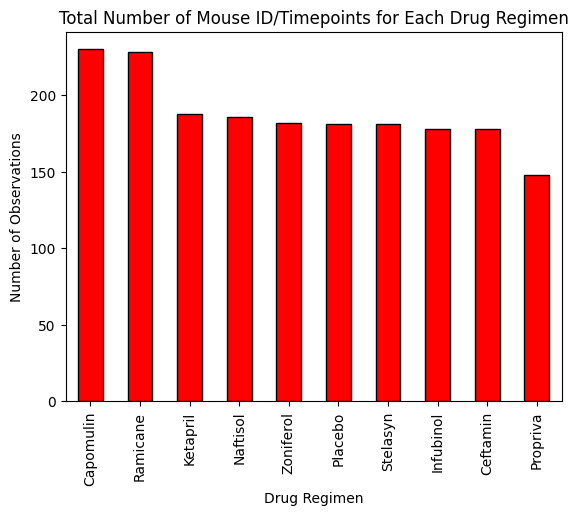

In [279]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_mouse_data['Drug Regimen'].value_counts()
regimen_count.plot(kind='bar', color='red', edgecolor='black')

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')
plt.show()


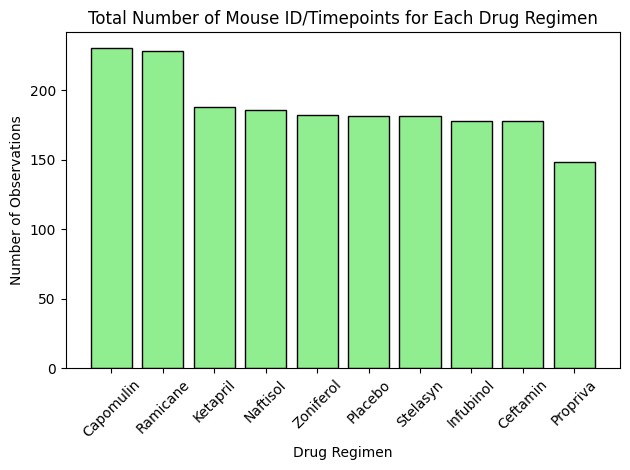

In [280]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count = clean_mouse_data['Drug Regimen'].value_counts()

plt.bar(regimen_count.index, regimen_count.values, color='lightgreen', edgecolor='black')

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

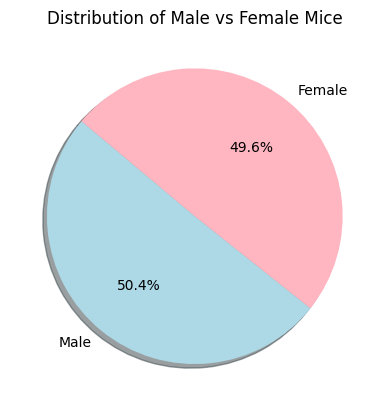

In [281]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_distribution = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'], shadow=True)

plt.title('Distribution of Male vs Female Mice')
plt.ylabel('')

plt.show()


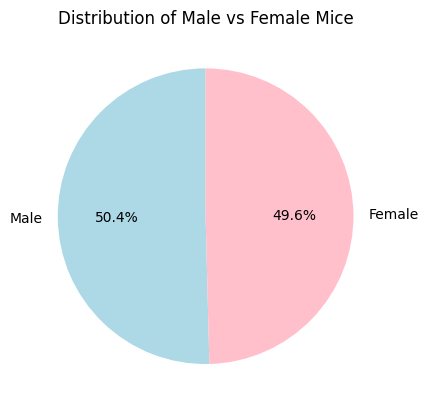

In [282]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_distribution = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'], labels=['Male', 'Female'], ylabel='')

plt.title('Distribution of Male vs Female Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']].head()


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543


In [284]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(treatment_data)
    
    # quartiles and iqr
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


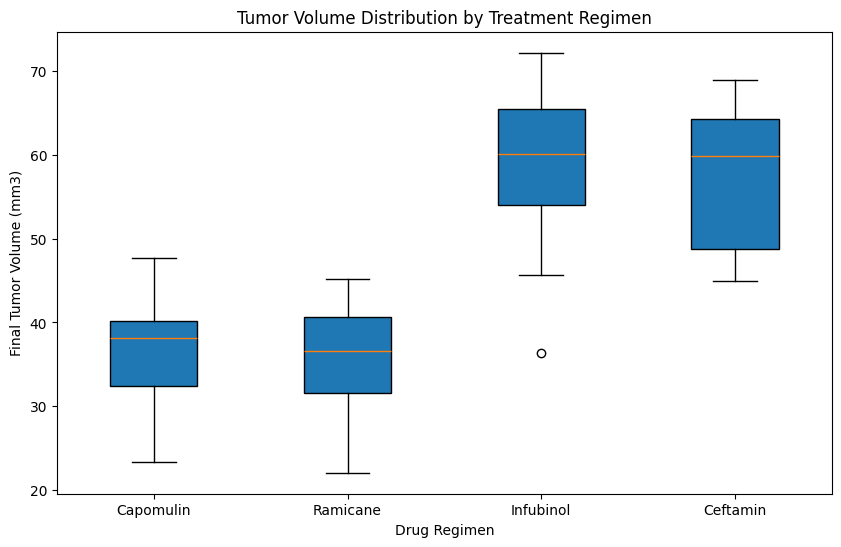

In [285]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))

# make plot
ax.boxplot(tumor_vol_data, tick_labels=treatments, patch_artist=True)

# labels
ax.set_title('Tumor Volume Distribution by Treatment Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

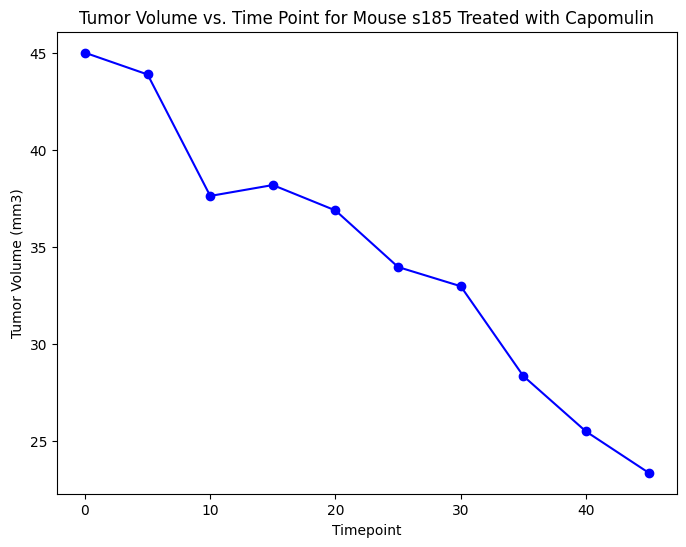

In [286]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']

# make plot
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# labels
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

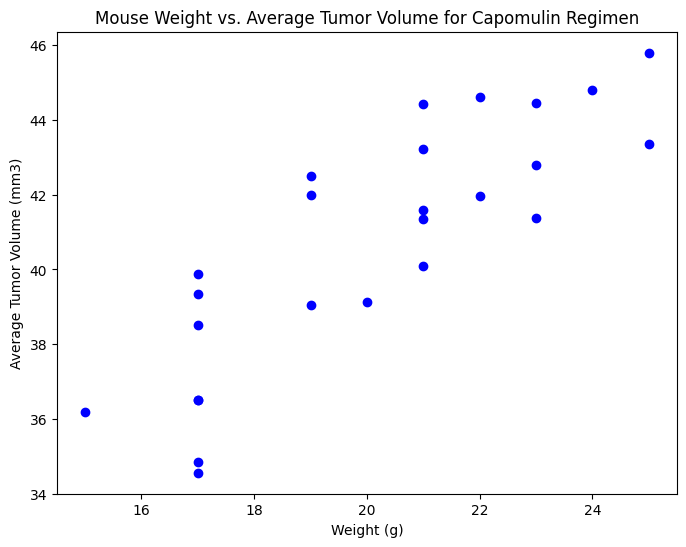

In [287]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# organize/clean data
capomulin_data.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')
capomulin_data.loc[:, 'Weight (g)'] = pd.to_numeric(capomulin_data['Weight (g)'], errors='coerce')
avg_tumor_vol = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']
capomulin_avg_tumor_weight = pd.merge(
    capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(),
    avg_tumor_vol.reset_index(),
    on='Mouse ID'
)

# make plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_tumor_weight['Weight (g)'], capomulin_avg_tumor_weight['Tumor Volume (mm3)'], color='blue')

# labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


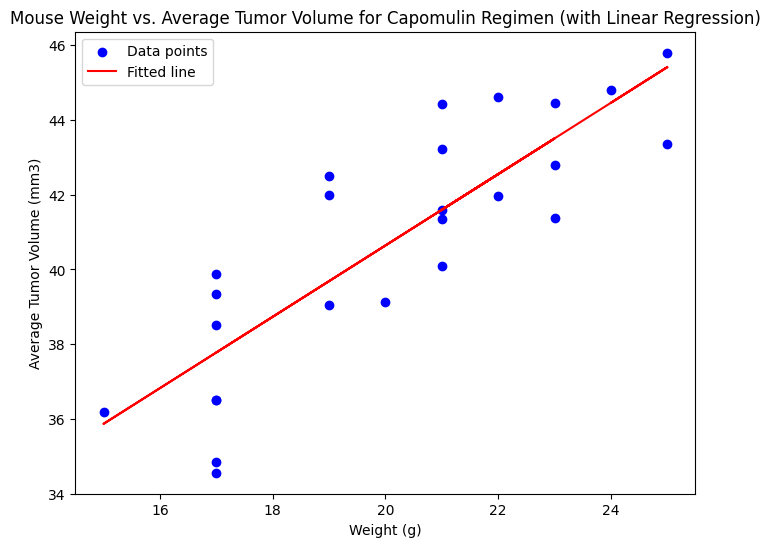

In [288]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_weight['Weight (g)'], capomulin_avg_tumor_weight['Tumor Volume (mm3)'])

# correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value, 2)}")

# make plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_tumor_weight['Weight (g)'], capomulin_avg_tumor_weight['Tumor Volume (mm3)'], color='blue', label='Data points')
regress_values = capomulin_avg_tumor_weight['Weight (g)'] * slope + intercept
plt.plot(capomulin_avg_tumor_weight['Weight (g)'], regress_values, color='red', label='Fitted line')

# labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen (with Linear Regression)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()